In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('03_data.csv')
data.head()

,Unnamed: 0,precio_m2,superficie_total,categoria,dormitorios,baños,cocheras,colonia,alcaldia,dist_metro
0,0,60144.927536,138.0,departamento,2.0,3.0,2.0,POLANCO REFORMA (POLANCO),MIGUEL HIDALGO,499.558324
1,1,104651.162791,172.0,departamento,2.0,2.0,2.0,POLANCO REFORMA (POLANCO),MIGUEL HIDALGO,755.632370
2,2,85919.540230,174.0,departamento,2.0,2.0,2.0,POLANCO REFORMA (POLANCO),MIGUEL HIDALGO,772.890462
3,3,5092.622951,183.0,departamento,3.0,3.0,2.0,POLANCO REFORMA (POLANCO),MIGUEL HIDALGO,1004.848305
4,4,93125.000000,160.0,departamento,2.0,2.0,2.0,POLANCO REFORMA (POLANCO),MIGUEL HIDALGO,480.029999


/Users/martinsingla/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


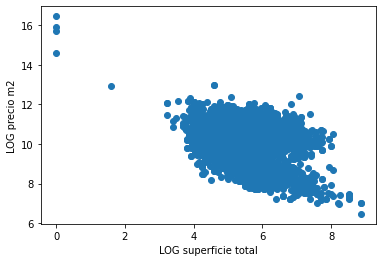

In [3]:
plt.scatter(y= np.log(data['precio_m2']), x= np.log(data['superficie_total']))
plt.ylabel('LOG precio m2')
plt.xlabel('LOG superficie total')
plt.show()

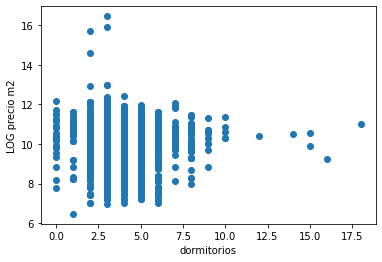

In [4]:
plt.scatter(y= np.log(data['precio_m2']), x= data['dormitorios'])
plt.ylabel('LOG precio m2')
plt.xlabel('dormitorios')
plt.show()

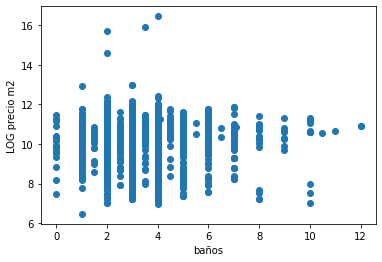

In [5]:
plt.scatter(y= np.log(data['precio_m2']), x= data['baños'])
plt.ylabel('LOG precio m2')
plt.xlabel('baños')
plt.show()

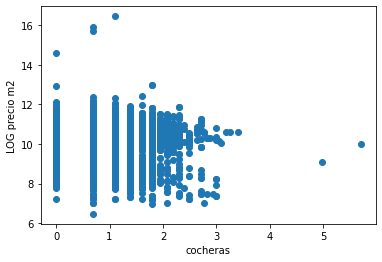

In [6]:
plt.scatter(y= np.log(data['precio_m2']), x= np.log(data['cocheras']))
plt.ylabel('LOG precio m2')
plt.xlabel('cocheras')
plt.show()

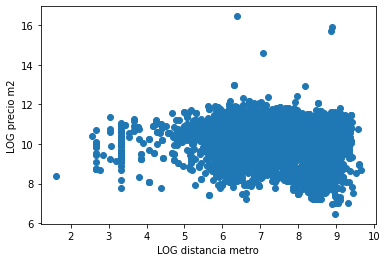

In [7]:
plt.scatter(y= np.log(data['precio_m2']), x= np.log(data['dist_metro']))
plt.ylabel('LOG precio m2')
plt.xlabel('LOG distancia metro')
plt.show()

In [ ]:
>>> import statsmodels.api as sm
>>> import numpy as np
>>> duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")
>>> Y = duncan_prestige.data['income']
>>> X = duncan_prestige.data['education']
>>> X = sm.add_constant(X)
>>> model = sm.OLS(Y,X)
>>> results = model.fit()
>>> results.params

In [17]:
data = data[(data['baños'].notnull()) & (data['dormitorios'].notnull()) & 
     (data['cocheras'].notnull()) & (data['superficie_total'].notnull()) & (data['precio_m2'].notnull())]

In [30]:
import statsmodels.api as sm

data['dist_metro_LOG'] = np.log(data['dist_metro'])

y= np.log(data['precio_m2'])
X= data[['dist_metro_LOG']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              precio_m2   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     11.85
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           0.000580
Time:                        02:20:32   Log-Likelihood:                -7874.0
No. Observations:                6166   AIC:                         1.575e+04
Df Residuals:                    6164   BIC:                         1.577e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.6020      0.067    157.